In [ ]:
!pip install transformers

   ---------------------------------------- 0.0/10.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/10.1 MB 5.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.4/10.1 MB 5.4 MB/s eta 0:00:02
   ------------- -------------------------- 3.4/10.1 MB 5.3 MB/s eta 0:00:02
   ------------------ --------------------- 4.7/10.1 MB 5.4 MB/s eta 0:00:02
   ---------------------- ----------------- 5.8/10.1 MB 5.4 MB/s eta 0:00:01
   --------------------------- ------------ 7.1/10.1 MB 5.5 MB/s eta 0:00:01
   --------------------------------- ------ 8.4/10.1 MB 5.6 MB/s eta 0:00:01
   -------------------------------------- - 9.7/10.1 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 10.1/10.1 MB 5.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.4 MB ? eta -:--:--
   ----------------- ---------------------- 1.0/2.4 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.4/2.4 MB 5.7 MB/s eta 0:00:00
Note: you may n

In [2]:
%pip install torch torchvision torchaudio matplotlib seaborn

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   ----- ---------------------------------- 1.0/7.8 MB 5.0 MB/s eta 0:00:02
   ---------- ----------------------------- 2.1/7.8 MB 5.3 MB/s eta 0:00:02
   ----------------- ---------------------- 3.4/7.8 MB 5.3 MB/s eta 0:00:01
   ---------------------- ----------------- 4.5/7.8 MB 5.4 MB/s eta 0:00:01
   ---------------------------- ----------- 5.5/7.8 MB 5.2 MB/s eta 0:00:01
   --------------------------------- ------ 6.6/7.8 MB 5.3 MB/s eta 0:00:01
   -------------------------------------- - 7.6/7.8 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 7.8/7.8 MB 5.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.2 MB ? eta -:--:--
   ------------------- -------------------- 1.0/2.2 MB 5.6 MB/s eta 0:00:01
   ---------------------------------------- 2.2/2.2 MB 5.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


Using cpu
Text: business not growing fast, Predicted Label: BUSI


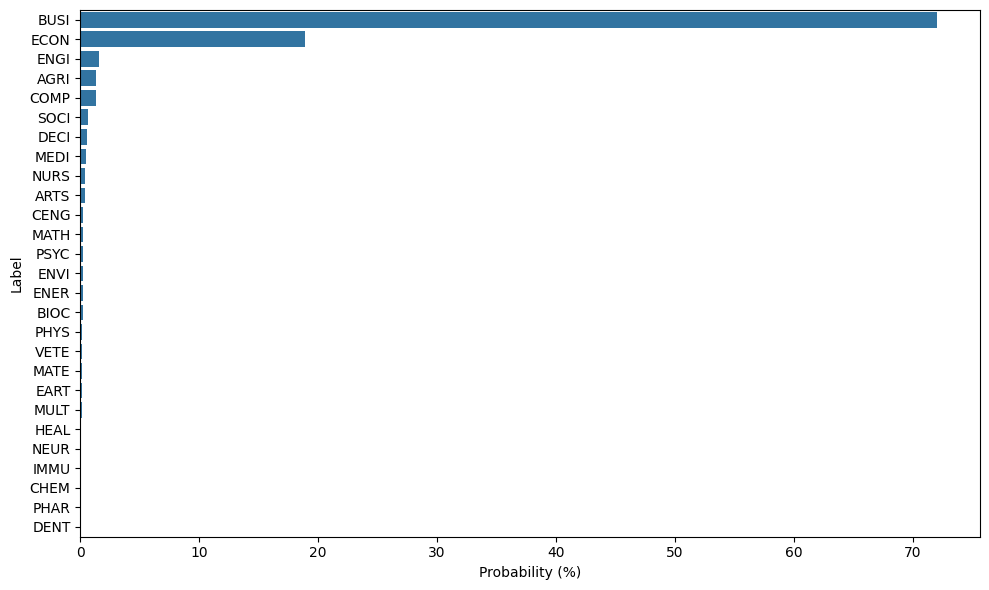

['BUSI']


In [8]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
import torch
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the pre-trained model and tokenizer
# model_name = '/mnt/c/Users/ASUS/Documents/Projects/data-sci/results/checkpoint-11500'
model_name = 'C:/Users/ASUS/Documents/Projects/data-sci/results/checkpoint-11500'
tokenizer = DistilBertTokenizer.from_pretrained('distilbert-base-uncased')
model = DistilBertForSequenceClassification.from_pretrained(model_name)
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using {device}")
model.to(device)

# Function to tokenize input texts
def tokenize_function(texts, max_length=512):
    return tokenizer(texts, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt')

# Sample texts for inference
new_texts = ["business not growing fast",]
new_encodings = tokenizer(new_texts, padding=True, truncation=True, return_tensors='pt').to(device)

# Convert predictions to labels
with open('label_map.json', 'r') as f:
    label_map = json.load(f)

inverse_label_map = {v: k for k, v in label_map.items()}
display_labels = [inverse_label_map[i] for i in range(len(label_map))]
with torch.no_grad():
    outputs = model(**new_encodings)
    predictions = torch.argmax(outputs.logits, dim=-1)
    pred_probs = torch.softmax(outputs.logits, dim=-1)
    for i, prediction in enumerate(predictions):
        print(f"Text: {new_texts[i]}, Predicted Label: {inverse_label_map[prediction.item()]}")
    # for label, prob in zip(display_labels, pred_probs[i]):
    #     print(f"Label: {label}, {prob*100:.2f}%")
    probs_df = pd.DataFrame({
        'Label': display_labels,
        'Probability': pred_probs[i].cpu().numpy() * 100  # Convert to NumPy array and scale to percentage
    })
    
    # create vizualization of the probabilities as seaborn figure
    
    # Create a bar plot using Seaborn
    probs_df = probs_df.sort_values('Probability', ascending=False)
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.barplot(x='Probability', y='Label', data=probs_df, orient='h')
    plt.xlabel('Probability (%)')
    plt.ylabel('Label')
    # plt.xticks(rot ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()



predicted_labels = [display_labels[prediction] for prediction in predictions]
print(predicted_labels)
